# Deep Learning with Fashion Mnist

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

## Define label

In [4]:
class_names = [
    "T-shirt/top",   # 0
    "Trouser",       # 1
    "Pullover",      # 2
    "Dress",         # 3
    "Coat",          # 4
    "Sandal",        # 5
    "Shirt",         # 6
    "Sneaker",       # 7
    "Bag",           # 8
    "Ankle boot"     # 9
]



## Sample images

In [5]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

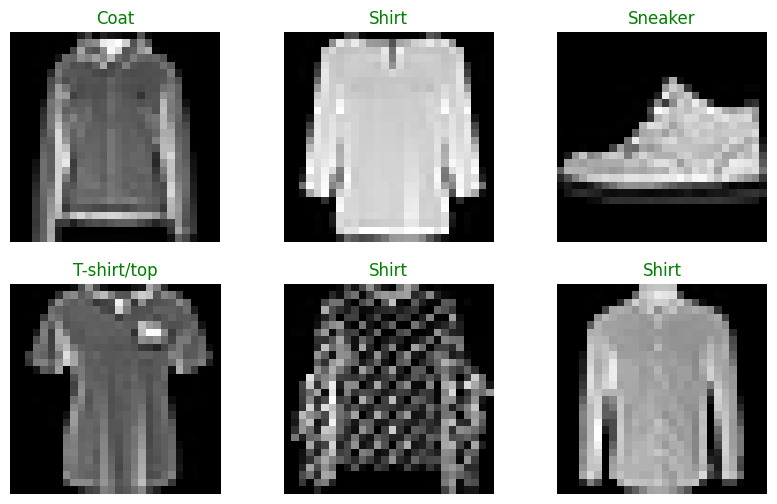

In [7]:
def get_image(x_data: np.ndarray, x_label_data: np.ndarray) -> None:
  nrows = 2
  ncols = 3
  total_image = len(x_data)
  fig, axs = plt.subplots(nrows, ncols, figsize = (10, 6))

  for row in range(nrows):
    for col in range(ncols):
      idex_image = random.randint(0, total_image -1)
      image = x_data[idex_image]
      label_image = class_names[x_label_data[idex_image]]

      axs[row, col].imshow(image, cmap = "gray")
      axs[row, col].set_title(label_image, color = "green")
      axs[row, col].axis("off")

  plt.show()
get_image(x_train, y_train)

## Image Pre-Processing

In [8]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [9]:
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(dtype('float32'), dtype('uint8'), dtype('float32'), dtype('uint8'))

In [10]:
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
y_train_label = keras.utils.to_categorical(y_train, len(class_names))
y_test_label = keras.utils.to_categorical(y_test, len(class_names))

In [13]:
y_train_label.shape, y_test_label.shape

((60000, 10), (10000, 10))

In [14]:
y_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Artificial Neural Networks

In [15]:
model = keras.Sequential([
    keras.Input(shape = (28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(len(class_names), activation = "softmax"),
])

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 10
batch_size = 128
history = model.fit(
    x_train, y_train_label,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7565 - loss: 0.6919 - val_accuracy: 0.8537 - val_loss: 0.3927
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8597 - loss: 0.3840 - val_accuracy: 0.8654 - val_loss: 0.3678
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8775 - loss: 0.3304 - val_accuracy: 0.8739 - val_loss: 0.3434
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8878 - loss: 0.3074 - val_accuracy: 0.8763 - val_loss: 0.3418
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8933 - loss: 0.2828 - val_accuracy: 0.8853 - val_loss: 0.3168
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8999 - loss: 0.2643 - val_accuracy: 0.8818 - val_loss: 0.3245
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9046 - loss: 0.2518 - val_accuracy: 0.8819 - val_loss: 0.3380
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9091 - loss: 0.2413 - val_ac

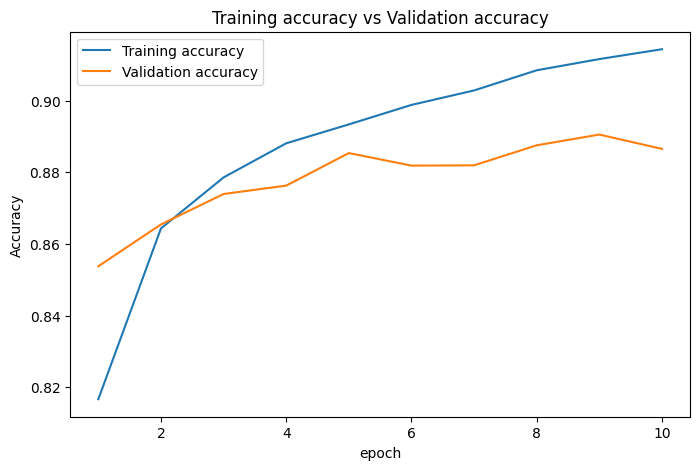

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_range = range(1, len(acc) + 1)

plt.figure(figsize = (8,5))
plt.plot(epoch_range, acc, label = 'Training accuracy')
plt.plot(epoch_range, val_acc, label = 'Validation accuracy')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()
plt.show();


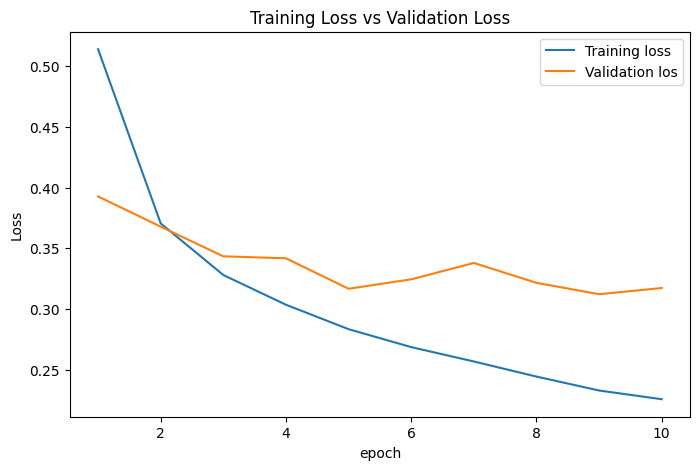

In [19]:
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.figure(figsize = (8,5))
plt.plot(epoch_range, acc, label = 'Training loss')
plt.plot(epoch_range, val_acc, label = 'Validation los')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.show();

## Prediction

In [20]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
predictions.shape

(10000, 10)

In [22]:
y_preds = np.argmax(predictions, axis = 1)

In [23]:
y_preds.shape

(10000,)

In [24]:
correct = np.sum(y_preds == y_test)
incorrect = np.sum(y_preds != y_test)

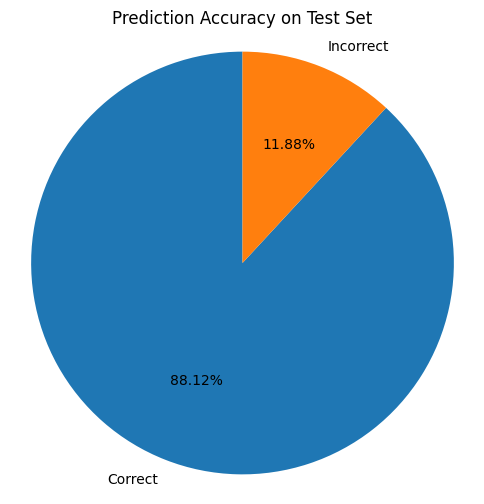

In [25]:
labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90
)
plt.title('Prediction Accuracy on Test Set')
plt.axis('equal')
plt.show()